In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
Datos = pd.read_csv('./heart_cleveland_upload.csv')

#### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

- VARIABLES INDEPENDIENTES: AGE, SEXO
- VARIABLES DEPENDIENTES: TRESTBPS,CHOL,THALACH

In [11]:
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'datos faltantes y atipicos')

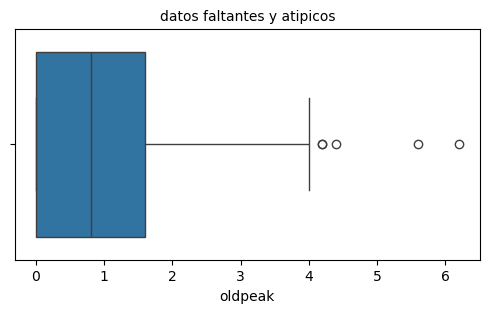

In [39]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['oldpeak'])
plt.title("datos faltantes y atipicos",fontsize=10)

#variable  atipicas: trestbps, chol ,fbs ,oldpeak ,ca

#### SE ENCUENTRAN LAS VARIABLES CON VALORES A TIPICOS O CON FALTANTES

* VARIABLES ATIPICAS: trestbps, chol ,fbs ,oldpeak ,ca
* VARIABLES CON FALNTANTES: NINGUNO

3 COMPROBAMOS

In [37]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [41]:
#variable  atipicas: trestbps, chol ,fbs ,oldpeak ,ca
#verifico valores faltantes
Datos.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [44]:
#variable  atipicas: trestbps, chol ,fbs ,oldpeak ,ca
#verifico si hay valores duplicados
print('Cantidad de registros duplicados: ',Datos.duplicated().sum())

Cantidad de registros duplicados:  0


In [ ]:
# con la informacion anterior se comprueba de que no hay valores duplicados y las variables atipicas: trestbps, chol ,fbs ,oldpeak ,ca
# tienen su data normal, segun las caracteristicas de cada campo, la data es acorde. por lo tanto no se realiza reemplazo ni limpieza

#### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

* CARACTERISTICAS DE INTERES:
* Enfermo: si la persona esta o no enfermo (0 -> no esta enfermo, 1-> esta enfermo)

In [46]:
Datos['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

#### 4 - Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [50]:
# train 75% y test 25%
x = Datos.drop('condition',axis=1)
y = Datos['condition']

x_train,x_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,stratify=y,random_state=0)

In [51]:
print(x_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3       200   288    1        2      133      1      4.0   
82    66    0   2       146   278    0        2      152      0      0.0   
36    56    1   1       120   240    0        0      169      0      0.0   
237   56    1   3       132   184    0        2      105      1      2.1   
133   47    1   2       108   243    0        0      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1      2.0   
195   61    0   3       130   330    0        2      169      0      0.0   
170   65    0   3       150   225    0        2      114      0      1.0   
135   46    0   2       142   177    0        2      160      1      1.4   
293   39    1   3       118   219    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82       1   1     0  
36       2   0    

In [52]:
print(x_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
185   62    0   3       140   268    0        2      160      0      3.6   
157   70    1   3       145   174    0        0      125      1      2.6   
110   54    0   2       135   304    1        0      170      0      0.0   
39    56    1   1       130   221    0        2      163      0      0.0   
198   60    1   3       130   206    0        2      132      1      2.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
278   45    1   3       115   260    0        2      185      0      0.0   
163   67    1   3       100   299    0        2      125      1      0.9   
137   44    0   2       108   141    0        0      175      0      0.6   
33    57    0   1       130   236    0        2      174      0      0.0   
246   54    1   3       110   239    0        0      126      1      2.8   

     slope  ca  thal  
185      2   2     0  
157      2   0     2  
110      0   0    

In [53]:
print(Y_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64


In [54]:
print(Y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


#### 5. Entrenar el modelo configurando los diferentes hiperparámetros.


In [57]:
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit(x_train,Y_train)

prediccion = modelo_regresion.predict(x_test)

In [58]:
print(Y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [59]:
print(prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


#### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [60]:
print(classification_report(Y_test,prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



## Evaluación del Modelo de Clasificación
El modelo de clasificación muestra un **desempeño prometedor**. Los principales hallazgos son:

* **Precisión:** El modelo alcanza una precisión general del 88%, lo que indica que, en promedio, clasifica correctamente las muestras el 88% de las veces.
* **Recall:** 
    * Para la clase "no enfermo", el recall es del 90%, lo que significa que identifica correctamente el 90% de los casos en los que la persona realmente no está enferma.
    * Para la clase "enfermo", el recall es del 86%, indicando que identifica correctamente el 86% de los casos en los que la persona realmente está enferma.
* **F1-score:** Con un valor promedio cercano a 0.88, el F1-score revela un buen equilibrio entre precisión y recall, lo que sugiere que el modelo es efectivo en ambas métricas.

**Conclusión:**
En general, el modelo presenta un buen rendimiento en la clasificación sefalsos negativos el modelo ofrece una buena base para la clasificación.
ad en un entorno real.

#### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.


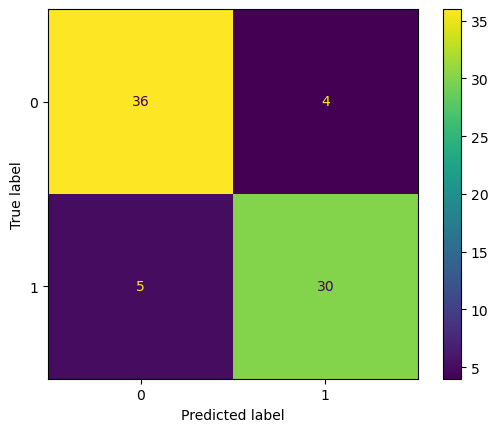

In [62]:
#matris de confucion
cm =confusion_matrix(Y_test,prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Al analizar el gráfico, se observa una distribución de datos balanceada:

* **No enfermos:** 36 personas fueron correctamente identificadas como no enfermas, mientras que 4 podrían presentar la enfermedad.
* **Enfermos:** 30 personas fueron correctamente identificadas como enfermas, y 5 podrían no estarlo.

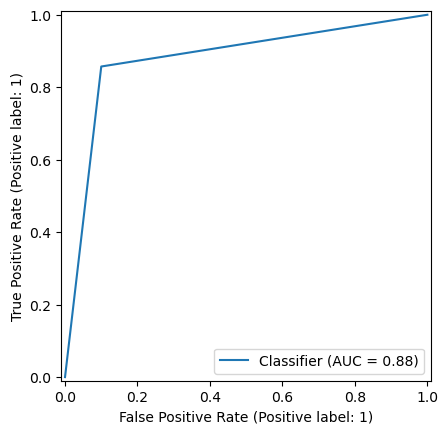

In [65]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, prediccion)
plt.show()

A medida que nos movemos a lo largo de esta curva hacia la esquina superior izquierda, aumenta tanto la tasa de verdaderos positivos como la de falsos positivos. El área bajo esta curva (AUC) es un indicador del rendimiento general del modelo. En este caso, un AUC de 0.88 indica un buen rendimiento, ya que está bastante cerca de 1 (el valor máximo posible).